In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/meltome/splits/mixed_split.csv')
df

,sequence,target,set,validation
0,MSGEEEKAADFYVRYYVGHKGKFGHEFLEFEFRPNGSLRYANNSNY...,37.962947,train,NaN
1,MSMGSDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDV...,54.425342,train,NaN
2,MRICFLLLAFLVAETFANELTRCCAGGTRHFKNSNTCSSIKSEGTS...,49.459216,train,NaN
3,MIRVALPTTASAIPRSISTSPGETISKNHEEEVKRVWRKADAVCFD...,42.593131,train,NaN
4,MNGDWSRAFVLSKVKNLYFFVIIDKGFSAILNDPREPVQVGGFFEV...,37.999478,train,NaN
...,...,...,...,...
27946,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...,47.008000,train,NaN
27947,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...,51.897881,train,NaN
27948,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,63.573439,train,NaN
27949,MGNAPSHSSEDEAAAAGGEGWGPHQDWAAVSGTTPGPGVAAPALPP...,51.344374,test,NaN


In [3]:
df['len'] = df['sequence'].apply(lambda x: len(x))
df

,sequence,target,set,validation,len
0,MSGEEEKAADFYVRYYVGHKGKFGHEFLEFEFRPNGSLRYANNSNY...,37.962947,train,NaN,152
1,MSMGSDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDV...,54.425342,train,NaN,148
2,MRICFLLLAFLVAETFANELTRCCAGGTRHFKNSNTCSSIKSEGTS...,49.459216,train,NaN,605
3,MIRVALPTTASAIPRSISTSPGETISKNHEEEVKRVWRKADAVCFD...,42.593131,train,NaN,263
4,MNGDWSRAFVLSKVKNLYFFVIIDKGFSAILNDPREPVQVGGFFEV...,37.999478,train,NaN,574
...,...,...,...,...,...
27946,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...,47.008000,train,NaN,858
27947,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...,51.897881,train,NaN,744
27948,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,63.573439,train,NaN,572
27949,MGNAPSHSSEDEAAAAGGEGWGPHQDWAAVSGTTPGPGVAAPALPP...,51.344374,test,NaN,2961


<AxesSubplot:>

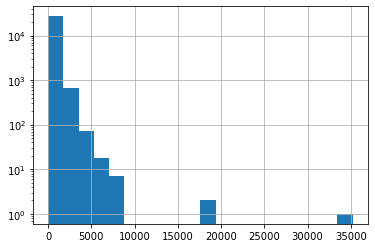

In [4]:
df['len'].hist(log=True, bins=20)

In [5]:
sorted(df['len'], reverse=True)[:30]

[35213,
 18562,
 18141,
 8797,
 8545,
 7570,
 7406,
 7355,
 7354,
 7158,
 6994,
 6885,
 6669,
 5890,
 5890,
 5890,
 5890,
 5890,
 5890,
 5890,
 5890,
 5795,
 5589,
 5588,
 5560,
 5488,
 5333,
 5322,
 5175,
 5151]

# Drop Top 3

In [6]:
long_idx = df.loc[df['len'] > 10000].index
print(long_idx)
df.drop(long_idx, inplace=True)
df.drop(columns=['len']).to_csv('../data/meltome/splits/mixed_split_short.csv', index=False)

Int64Index([1090, 2222, 17601], dtype='int64')


# Drop Top 0.1%

In [7]:
idx = round(len(df)/1000)
print('Dropping top 0.1% will drop', idx, 
      'sequences, with the longest having length', sorted(df['len'], reverse=True)[idx])

Dropping top 0.1% will drop 28 sequences, with the longest having length 5088


In [8]:
long_idx = df.loc[df['len'] > 5175].index
print(long_idx)
df.drop(long_idx, inplace=True)
df.drop(columns=['len']).to_csv('../data/meltome/splits/mixed_split_short999.csv', index=False)

Int64Index([   37,  1068,  1743,  1892,  2084,  3236, 10726, 11266, 15912,
            17945, 18042, 18588, 20108, 20109, 20110, 20111, 20112, 20113,
            20114, 20115, 20116, 21867, 24374, 26774, 26775],
           dtype='int64')


# Drop Top 1%

In [9]:
idx = round(len(df)/100)
print('Dropping top 1% will drop', idx, 
      'sequences, with the longest having length', sorted(df['len'], reverse=True)[idx])

Dropping top 1% will drop 279 sequences, with the longest having length 2364


In [10]:
long_idx = df.loc[df['len'] > 2417].index
print(long_idx)
df.drop(long_idx, inplace=True)
df.drop(columns=['len']).to_csv('../data/meltome/splits/mixed_split_short99.csv', index=False)

Int64Index([   19,    39,    63,    64,    91,   778,   939,   983,  1145,
             1221,
            ...
            27474, 27488, 27509, 27525, 27526, 27548, 27748, 27769, 27866,
            27949],
           dtype='int64', length=251)
